# Inputs

In [470]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import json

import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

import plotly.graph_objects as go

In [471]:
# Import the data from a Json file

with open('/Users/apple/Desktop/Python/projects/Spotify/MyData/StreamingHistory0.json', encoding='utf8') as f:
    data = json.load(f)

print(data[:5])

[{'endTime': '2019-07-25 12:55', 'artistName': 'Martin Garrix', 'trackName': 'Ocean (feat. Khalid)', 'msPlayed': 167066}, {'endTime': '2019-07-25 17:25', 'artistName': 'Liam Payne', 'trackName': 'Strip That Down', 'msPlayed': 82686}, {'endTime': '2019-07-26 04:00', 'artistName': 'DJ Snake', 'trackName': 'Smile (feat. Bryson Tiller)', 'msPlayed': 22430}, {'endTime': '2019-07-26 04:01', 'artistName': 'End of the World', 'trackName': 'Lost', 'msPlayed': 53893}, {'endTime': '2019-07-26 04:02', 'artistName': 'DJ Snake', 'trackName': 'Smile (feat. Bryson Tiller)', 'msPlayed': 43026}]


In [472]:
# Convert from JSON to a data frame

history_1 = pd.DataFrame()

def extract_json_value(column_name):
    
    return [i[column_name] for i in data]

history_1['artist_name'] = extract_json_value('artistName')
history_1['end_time'] = extract_json_value('endTime')
history_1['ms_played'] = extract_json_value('msPlayed')
history_1['track_name'] = extract_json_value('trackName')

In [473]:
history_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   artist_name  10000 non-null  object
 1   end_time     10000 non-null  object
 2   ms_played    10000 non-null  int64 
 3   track_name   10000 non-null  object
dtypes: int64(1), object(3)
memory usage: 312.6+ KB


In [474]:
with open('/Users/apple/Desktop/Python/projects/Spotify/MyData/StreamingHistory1.json', encoding='utf8') as f:
    data = json.load(f)

print(data[:5])

[{'endTime': '2020-03-13 20:22', 'artistName': 'Tori Kelly', 'trackName': 'I Was Made For Loving You', 'msPlayed': 188940}, {'endTime': '2020-03-13 20:25', 'artistName': 'The Vamps', 'trackName': 'Wake Up', 'msPlayed': 193512}, {'endTime': '2020-03-13 20:28', 'artistName': 'Shawn Mendes', 'trackName': 'Stitches', 'msPlayed': 206880}, {'endTime': '2020-03-13 20:32', 'artistName': 'One Direction', 'trackName': 'Drag Me Down', 'msPlayed': 192167}, {'endTime': '2020-03-13 20:35', 'artistName': 'Justin Bieber', 'trackName': 'Baby', 'msPlayed': 214240}]


In [475]:
history_2 = pd.DataFrame()

def extract_json_value(column_name):
    
    return [i[column_name] for i in data]

history_2['artist_name'] = extract_json_value('artistName')
history_2['end_time'] = extract_json_value('endTime')
history_2['ms_played'] = extract_json_value('msPlayed')
history_2['track_name'] = extract_json_value('trackName')

In [476]:
history_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   artist_name  2499 non-null   object
 1   end_time     2499 non-null   object
 2   ms_played    2499 non-null   int64 
 3   track_name   2499 non-null   object
dtypes: int64(1), object(3)
memory usage: 78.2+ KB


In [477]:
history = history_1.append(history_2)

In [478]:
history

,artist_name,end_time,ms_played,track_name
0,Martin Garrix,2019-07-25 12:55,167066,Ocean (feat. Khalid)
1,Liam Payne,2019-07-25 17:25,82686,Strip That Down
2,DJ Snake,2019-07-26 04:00,22430,Smile (feat. Bryson Tiller)
3,End of the World,2019-07-26 04:01,53893,Lost
4,DJ Snake,2019-07-26 04:02,43026,Smile (feat. Bryson Tiller)
...,...,...,...,...
2494,Taylor Swift,2020-07-26 12:56,0,the last great american dynasty
2495,Taylor Swift,2020-07-26 12:56,0,the 1
2496,Ami Mishra,2020-07-26 12:56,3765,Hasi - Female Version
2497,Taylor Swift,2020-07-26 12:56,0,exile (feat. Bon Iver)


In [479]:
#converting end_time to timestamp format
history['end_time'] = pd.to_datetime(history['end_time'])
history.head()

,artist_name,end_time,ms_played,track_name
0,Martin Garrix,2019-07-25 12:55:00,167066,Ocean (feat. Khalid)
1,Liam Payne,2019-07-25 17:25:00,82686,Strip That Down
2,DJ Snake,2019-07-26 04:00:00,22430,Smile (feat. Bryson Tiller)
3,End of the World,2019-07-26 04:01:00,53893,Lost
4,DJ Snake,2019-07-26 04:02:00,43026,Smile (feat. Bryson Tiller)


In [480]:
history['minutes_played'] = history.ms_played.divide(60000)
history.drop('ms_played', axis=1, inplace=True)
history.head()

,artist_name,end_time,track_name,minutes_played
0,Martin Garrix,2019-07-25 12:55:00,Ocean (feat. Khalid),2.784433
1,Liam Payne,2019-07-25 17:25:00,Strip That Down,1.378100
2,DJ Snake,2019-07-26 04:00:00,Smile (feat. Bryson Tiller),0.373833
3,End of the World,2019-07-26 04:01:00,Lost,0.898217
4,DJ Snake,2019-07-26 04:02:00,Smile (feat. Bryson Tiller),0.717100


# Popularity of artist based on the number of times their songs were clicked and played

In [481]:

most_played_artists_by_count = history.groupby(by='artist_name')['track_name'].count().sort_values(ascending=False)[:15]

print('The most popular artists by number of times their songs were played were: \n\n{}'.format(most_played_artists_by_count))

The most popular artists by number of times their songs were played were: 

artist_name
Lauv                   420
Shawn Mendes           351
One Direction          330
Justin Bieber          231
Taylor Swift           207
Ariana Grande          204
Post Malone            184
Ed Sheeran             183
Maroon 5               183
Selena Gomez           141
Arijit Singh           139
ZAYN                   139
5 Seconds of Summer    137
Khalid                 123
Jonas Brothers         120
Name: track_name, dtype: int64


In [790]:
# Visualize the most popular artists with a standard bar chart

colors = ['RGB(103, 0, 31)','RGB(178, 24, 43)','RGB(214, 96, 77)','RGB(244, 165, 130)','RGB(253, 219, 199)',
          'RGB(247, 247, 247)','RGB(209, 229, 240)','RGB(146, 197, 222)','RGB(67, 147, 195)','RGB(33, 102, 172)',
          'RGB(5, 48, 97)']


layout = go.Layout(
    title='Popularity Of Artists By Number Of Times Their Song Was Played',
    yaxis= dict(
        title="Number of Times Played",
        gridcolor='rgb(255, 255, 255)',
        zerolinewidth=1,
        ticklen=5,
        gridwidth=2,
        titlefont=dict(size=15)),
    xaxis=dict(title="Artist Name"))


fig = go.Figure(data=[go.Bar(x=most_played_artists_by_count.index,
                             y=most_played_artists_by_count,
                             textposition='auto',
                             opacity=1,
                             marker_color=colors)])
fig.show()

# Popularity of artist based on the total amount of time spent listening to their songs

In [483]:
# Look at most popular artists by amount of time spent listening to their songs

amount_of_time = history.groupby(by='artist_name')['minutes_played'].sum().sort_values(ascending=False)[:15]

amount_of_time

artist_name
Lauv                   983.881300
Shawn Mendes           847.727450
One Direction          808.053700
Justin Bieber          473.692417
Ed Sheeran             465.640783
Taylor Swift           452.288650
Ariana Grande          445.701400
Post Malone            438.692483
Maroon 5               430.427483
Arijit Singh           419.329617
ZAYN                   355.683833
5 Seconds of Summer    316.565317
Selena Gomez           300.926300
The Chainsmokers       298.733767
Little Mix             282.190717
Name: minutes_played, dtype: float64

In [484]:
colors = ['RGB(103, 0, 31)','RGB(178, 24, 43)','RGB(214, 96, 77)','RGB(244, 165, 130)','RGB(253, 219, 199)',
          'RGB(247, 247, 247)','RGB(209, 229, 240)','RGB(146, 197, 222)','RGB(67, 147, 195)','RGB(33, 102, 172)',
          'RGB(5, 48, 97)']

layout = go.Layout(
    title='Popularity of artists by amount of time spent listening to their song',
    yaxis= dict(
        title='Amount of time (in minutes)',
        gridcolor='rgb(255, 255, 255)',
        zerolinewidth=1,
        ticklen=5,
        gridwidth=2,
        titlefont=dict(size=15)),
    xaxis= dict(
        title = 'Artist Name'))


fig = go.Figure(data=[go.Bar(x=amount_of_time.index,
                             y=amount_of_time,
                             opacity=1,
                            marker_color=colors)])

fig.show()


# Total amount of time spent listening to music each day

In [485]:
history['day'] = [d.date() for d in history['end_time']]
history['time'] = [d.time() for d in history['end_time']]
history.drop('end_time', axis=1, inplace=True)
history.head()

,artist_name,track_name,minutes_played,day,time
0,Martin Garrix,Ocean (feat. Khalid),2.784433,2019-07-25,12:55:00
1,Liam Payne,Strip That Down,1.378100,2019-07-25,17:25:00
2,DJ Snake,Smile (feat. Bryson Tiller),0.373833,2019-07-26,04:00:00
3,End of the World,Lost,0.898217,2019-07-26,04:01:00
4,DJ Snake,Smile (feat. Bryson Tiller),0.717100,2019-07-26,04:02:00


In [486]:
day = history.groupby(by=['day'], as_index=False).sum()
day.head()

,day,minutes_played
0,2019-07-25,4.162533
1,2019-07-26,82.446783
2,2019-07-27,167.962117
3,2019-07-28,75.483533
4,2019-07-29,66.716250


In [785]:
fig = px.line(day, x="day", y="minutes_played",
              labels={
                     "day": "Month",
                     "minutes_played": "Minutes Played"},
              color_discrete_sequence=px.colors.sequential.RdBu, title="Timeline Of My Streaming History")

fig.show()

# Time spent listening on each day of the week

In [488]:
date = history_1.append(history_2)
date['minutes_played'] = date.ms_played.divide(60000)
date.drop('ms_played', axis=1, inplace=True)

date['day'] = pd.DatetimeIndex(date['end_time']).day_name()

date.head()

,artist_name,end_time,track_name,minutes_played,day
0,Martin Garrix,2019-07-25 12:55,Ocean (feat. Khalid),2.784433,Thursday
1,Liam Payne,2019-07-25 17:25,Strip That Down,1.378100,Thursday
2,DJ Snake,2019-07-26 04:00,Smile (feat. Bryson Tiller),0.373833,Friday
3,End of the World,2019-07-26 04:01,Lost,0.898217,Friday
4,DJ Snake,2019-07-26 04:02,Smile (feat. Bryson Tiller),0.717100,Friday


In [489]:
date = date.groupby(by=['day'], as_index=False).sum()
date.head()

,day,minutes_played
0,Friday,4430.066083
1,Monday,3800.879250
2,Saturday,3752.872233
3,Sunday,4550.617650
4,Thursday,3876.916433


In [808]:
fig = px.pie(date, names="day", values="minutes_played", color_discrete_sequence=px.colors.sequential.RdBu)

fig.show()

# Artist and their songs

In [582]:
artist = history_1.append(history_2)
artist['minutes_played'] = artist.ms_played.divide(60000)
artist.drop('ms_played', axis=1, inplace=True)
artist.drop('end_time', axis=1, inplace=True)

artist.head()

,artist_name,track_name,minutes_played
0,Martin Garrix,Ocean (feat. Khalid),2.784433
1,Liam Payne,Strip That Down,1.378100
2,DJ Snake,Smile (feat. Bryson Tiller),0.373833
3,End of the World,Lost,0.898217
4,DJ Snake,Smile (feat. Bryson Tiller),0.717100


In [583]:
artist_1 = artist.drop_duplicates(subset = ["track_name"])
artist_1.drop('minutes_played', axis=1, inplace=True)
artist_1

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,artist_name,track_name
0,Martin Garrix,Ocean (feat. Khalid)
1,Liam Payne,Strip That Down
2,DJ Snake,Smile (feat. Bryson Tiller)
3,End of the World,Lost
5,Taylor Swift,The Archer
...,...,...
2474,Taylor Swift,mad woman
2475,Taylor Swift,peace
2476,Taylor Swift,hoax
2477,Taylor Swift,I Know Places


In [584]:
artist_1 = artist_1.groupby(['artist_name'], as_index = False).count()

artist_1

,artist_name,track_name
0,*NSYNC,1
1,2 Chainz,3
2,21 Savage,5
3,24kGoldn,2
4,5 Seconds of Summer,34
...,...,...
1392,slace n' cal,1
1393,tzelun,1
1394,will.i.am,1
1395,zack villere,1


In [585]:
artist_1 = artist_1.rename(columns={"track_name": "unique_songs"})
artist_1.head()

,artist_name,unique_songs
0,*NSYNC,1
1,2 Chainz,3
2,21 Savage,5
3,24kGoldn,2
4,5 Seconds of Summer,34


In [586]:
time = artist.groupby(['artist_name'], as_index=False).sum()

time.head()

,artist_name,minutes_played
0,*NSYNC,0.649750
1,2 Chainz,10.268600
2,21 Savage,27.257600
3,24kGoldn,9.716533
4,2CELLOS,2.095783


In [587]:
top_artist = pd.merge(artist_1, time, on='artist_name')
top_artist = top_artist.sort_values(by='unique_songs', ascending=False).head(20)
top_artist

,artist_name,unique_songs,minutes_played
116,Ariana Grande,79,445.701400
682,Lauv,72,983.881300
1192,Taylor Swift,63,452.288650
609,Justin Bieber,62,473.692417
895,One Direction,54,808.053700
1094,Shawn Mendes,51,847.727450
12,A.R. Rahman,48,213.813883
359,Ed Sheeran,37,465.640783
117,Arijit Singh,37,419.329617
954,Pritam,35,156.542300


In [590]:
fig = px.scatter(top_artist, x="artist_name", y="minutes_played", title='Total amount of time spent listening to each artist', size="unique_songs", color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

# Most listened to song

In [794]:
song = history_1.append(history_2)
song['minutes_played'] = song.ms_played.divide(60000)
song.drop('ms_played', axis=1, inplace=True)
song

,artist_name,end_time,track_name,minutes_played
0,Martin Garrix,2019-07-25 12:55,Ocean (feat. Khalid),2.784433
1,Liam Payne,2019-07-25 17:25,Strip That Down,1.378100
2,DJ Snake,2019-07-26 04:00,Smile (feat. Bryson Tiller),0.373833
3,End of the World,2019-07-26 04:01,Lost,0.898217
4,DJ Snake,2019-07-26 04:02,Smile (feat. Bryson Tiller),0.717100
...,...,...,...,...
2494,Taylor Swift,2020-07-26 12:56,the last great american dynasty,0.000000
2495,Taylor Swift,2020-07-26 12:56,the 1,0.000000
2496,Ami Mishra,2020-07-26 12:56,Hasi - Female Version,0.062750
2497,Taylor Swift,2020-07-26 12:56,exile (feat. Bon Iver),0.000000


In [795]:
song = song.groupby(['track_name'], as_index=False).sum()
song = song.sort_values(by='minutes_played', ascending=False)
song

,track_name,minutes_played
1121,Gayatri Mantra 108 Times,211.699300
2140,Memories,187.103883
639,Circles,124.916100
1972,Lose You To Love Me,110.737033
2563,Photograph,101.948100
...,...,...
250,Asmr Rain and Piano Sleep,0.000000
2137,Mellow,0.000000
3934,love me harder - live,0.000000
3972,side to side - live,0.000000


In [796]:
song_artist = history_1.append(history_2)
song_artist = song_artist.sort_values(by='track_name', ascending=False)
song_artist.drop('end_time', axis=1, inplace=True)
song_artist.drop('ms_played', axis=1, inplace=True)
song_artist.head(10)

,artist_name,track_name
5165,Greyson Chance,yours
5196,Greyson Chance,yours
5164,Ariana Grande,you'll never know - live
78,Jeremy Zucker,you were good to me
3448,Jeremy Zucker,you were good to me
3322,Jeremy Zucker,you were good to me
4138,Jeremy Zucker,you were good to me
5704,Jeremy Zucker,you were good to me
7926,Jeremy Zucker,you were good to me
74,Jeremy Zucker,you were good to me


In [797]:
song_artist = song_artist.drop_duplicates(subset = ["track_name"])
song_artist

,artist_name,track_name
5165,Greyson Chance,yours
5164,Ariana Grande,you'll never know - live
78,Jeremy Zucker,you were good to me
1881,Nightly,you should probably just hang up
867,Tate McRae,you broke me first
...,...,...
469,blackbear,1 SIDED LOVE
2391,Britney Spears,...Baby One More Time
1562,Mariah Carey,#Beautiful
2124,Jon Hamm,"""What did you do?"""


In [798]:
song = pd.merge(song_artist, song, on='track_name')
song = song.sort_values(by='minutes_played', ascending=False)
song

,artist_name,track_name,minutes_played
2887,Ravindra Sathe,Gayatri Mantra 108 Times,211.699300
1868,Maroon 5,Memories,187.103883
3369,Post Malone,Circles,124.916100
2036,Selena Gomez,Lose You To Love Me,110.737033
1445,Ed Sheeran,Photograph,101.948100
...,...,...,...
143,Ariana Grande,dangerous woman - live,0.000000
493,KK,Uyirin Uyire,0.000000
155,Ariana Grande,breathin - live,0.000000
157,Ariana Grande,break your heart right back - live,0.000000


In [802]:
song = song.sort_values(by='minutes_played', ascending=False).head(16)
song.reset_index(inplace = True, drop = True) 
song

,artist_name,track_name,minutes_played
0,Ravindra Sathe,Gayatri Mantra 108 Times,211.699300
1,Maroon 5,Memories,187.103883
2,Post Malone,Circles,124.916100
3,Selena Gomez,Lose You To Love Me,110.737033
4,Ed Sheeran,Photograph,101.948100
5,SHAED,Trampoline (with ZAYN),100.055867
6,Lauv,Feelings,96.885317
7,Lauv,I Like Me Better,91.949817
8,JP Saxe,If the World Was Ending - feat. Julia Michaels,78.010283
9,Lauv,Breathe,77.107300


In [805]:
songs = song.drop(song.index[0])
songs

,artist_name,track_name,minutes_played
1,Maroon 5,Memories,187.103883
2,Post Malone,Circles,124.916100
3,Selena Gomez,Lose You To Love Me,110.737033
4,Ed Sheeran,Photograph,101.948100
5,SHAED,Trampoline (with ZAYN),100.055867
6,Lauv,Feelings,96.885317
7,Lauv,I Like Me Better,91.949817
8,JP Saxe,If the World Was Ending - feat. Julia Michaels,78.010283
9,Lauv,Breathe,77.107300
10,Shawn Mendes,If I Can't Have You,76.392150


In [807]:
fig = px.bar(songs, x="track_name", y="minutes_played", title = 'Most Listened To Songs', color = "artist_name", color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

# Top 50 Songs

In [505]:
top_50 = history_1.append(history_2)
top_50['minutes_played'] = top_50.ms_played.divide(60000)
top_50.drop('ms_played', axis=1, inplace=True)
top_50

,artist_name,end_time,track_name,minutes_played
0,Martin Garrix,2019-07-25 12:55,Ocean (feat. Khalid),2.784433
1,Liam Payne,2019-07-25 17:25,Strip That Down,1.378100
2,DJ Snake,2019-07-26 04:00,Smile (feat. Bryson Tiller),0.373833
3,End of the World,2019-07-26 04:01,Lost,0.898217
4,DJ Snake,2019-07-26 04:02,Smile (feat. Bryson Tiller),0.717100
...,...,...,...,...
2494,Taylor Swift,2020-07-26 12:56,the last great american dynasty,0.000000
2495,Taylor Swift,2020-07-26 12:56,the 1,0.000000
2496,Ami Mishra,2020-07-26 12:56,Hasi - Female Version,0.062750
2497,Taylor Swift,2020-07-26 12:56,exile (feat. Bon Iver),0.000000


In [506]:
top_50 = top_50.groupby(['track_name'], as_index=False).sum()
top_50 = top_50.sort_values(by='minutes_played', ascending=False).head(51)
top_50.reset_index(inplace = True, drop = True) 
top_50

,track_name,minutes_played
0,Gayatri Mantra 108 Times,211.699300
1,Memories,187.103883
2,Circles,124.916100
3,Lose You To Love Me,110.737033
4,Photograph,101.948100
5,Trampoline (with ZAYN),100.055867
6,Feelings,96.885317
7,I Like Me Better,91.949817
8,If the World Was Ending - feat. Julia Michaels,78.010283
9,Breathe,77.107300


In [507]:
top_50.drop(top_50.index[0])

,track_name,minutes_played
1,Memories,187.103883
2,Circles,124.916100
3,Lose You To Love Me,110.737033
4,Photograph,101.948100
5,Trampoline (with ZAYN),100.055867
6,Feelings,96.885317
7,I Like Me Better,91.949817
8,If the World Was Ending - feat. Julia Michaels,78.010283
9,Breathe,77.107300
10,If I Can't Have You,76.392150


# Visualisation

acousticness - float - A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic. 

danceability - float - Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

energy - float - Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy.

instrumentalness - float - Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content.

liveness - float - Detects the presence of an audience in the recording.

loudness - float - The overall loudness of a track in decibels (dB). 

speechiness - float - Speechiness detects the presence of spoken words in a track.

valence - float - A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. 

tempo - float - The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration

mode - int - Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

key - int - The estimated overall key of the track.

In [563]:
my_songs = pd.read_csv("song.csv", encoding= 'unicode_escape')
my_songs.drop('Unnamed: 15', axis=1, inplace=True)
my_songs.drop('Unnamed: 14', axis=1, inplace=True)
my_songs.drop('Unnamed: 16', axis=1, inplace=True)
my_songs.head()

,track_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Gayatri Mantra 108 Times,0.635,0.704,5.0,-2.394,0,0.043,0.720,0.000000,0.069,0.448,137.124,1787995,4
1,Memories,0.764,0.320,11.0,-7.209,1,0.055,0.837,0.000000,0.082,0.575,91.019,189486,4
2,Circles,0.695,0.762,0.0,-3.497,1,0.040,0.192,0.002440,0.086,0.553,120.042,215280,4
3,Lose You To Love Me,0.488,0.343,4.0,-8.985,1,0.044,0.556,0.000000,0.210,0.098,102.819,206459,4
4,Photograph,0.614,0.379,4.0,-10.480,1,0.048,0.607,0.000464,0.099,0.201,107.989,258987,4


# Spider Graph Comparisson of top 5

In [564]:
top_5 = my_songs.head(6)
top_5.drop('key', axis=1, inplace=True)
top_5.drop('mode', axis=1, inplace=True)
top_5.drop('instrumentalness', axis=1, inplace=True)
top_5.drop('liveness', axis=1, inplace=True)
top_5.drop('valence', axis=1, inplace=True)
top_5.drop('tempo', axis=1, inplace=True)
top_5.drop('duration_ms', axis=1, inplace=True)
top_5.drop('time_signature', axis=1, inplace=True)
top_5

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,track_name,danceability,energy,loudness,speechiness,acousticness
0,Gayatri Mantra 108 Times,0.635,0.704,-2.394,0.043,0.720
1,Memories,0.764,0.320,-7.209,0.055,0.837
2,Circles,0.695,0.762,-3.497,0.040,0.192
3,Lose You To Love Me,0.488,0.343,-8.985,0.044,0.556
4,Photograph,0.614,0.379,-10.480,0.048,0.607
5,Trampoline (with ZAYN),0.616,0.736,-3.708,0.077,0.570


In [565]:
top_5.drop(top_5.index[0])

,track_name,danceability,energy,loudness,speechiness,acousticness
1,Memories,0.764,0.320,-7.209,0.055,0.837
2,Circles,0.695,0.762,-3.497,0.040,0.192
3,Lose You To Love Me,0.488,0.343,-8.985,0.044,0.556
4,Photograph,0.614,0.379,-10.480,0.048,0.607
5,Trampoline (with ZAYN),0.616,0.736,-3.708,0.077,0.570


In [591]:
import plotly.graph_objects as go

categories = ['danceability','energy',
              'loudness', 'speechiness', 'acousticness']

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=[0.764,0.320,-7.209,0.055,0.837],
      theta=categories,
      fill='toself',
      name='Memories'
))

fig.add_trace(go.Scatterpolar(
      r=[0.695,0.762,-3.497,0.040,0.192],
      theta=categories,
      fill='toself',
      name='Circles'
))


fig.add_trace(go.Scatterpolar(
      r=[0.488,0.343,-8.985,0.044,0.556],
      theta=categories,
      fill='toself',
      name='Lose You To Love Me'
))

fig.update_layout(
    title = "Diversity in audio features of top 3 songs",
    polar=dict(
    radialaxis=dict(
      visible=True,
      range=[-10, 1]
    )),
  showlegend=True)

fig.show()

In [638]:
my_songs.mean(axis=0)
avg_my_songs = pd.DataFrame({"danceability":[0.622140], 
                             "energy":[0.593160],
                             "key":[5.940000],
                             "loudness":[-6.460500],
                             "mode":[0.800000],
                             "speechiness":[0.067240],
                             "acousticness":[0.359720],
                             "instrumentalness":[0.002873],
                             "liveness":[0.155520],
                             "valence":[0.454660],
                             "tempo":[116.117440],
                             "duration_ms":[252700.720000],
                             "time_signature":[3.920000]})
avg_my_songs

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.62214,0.59316,5.94,-6.4605,0.8,0.06724,0.35972,0.002873,0.15552,0.45466,116.11744,252700.72,3.92


# Happy or Sad?

valence - float - A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. The closer it is to 1, the more positive/happy

In [611]:
v = [0.448,0.575,0.553,0.098,0.201,0.673,0.246,0.419,0.604,0.417,0.864,0.168,0.471,0.223,0.678,0.424,0.446,0.355,0.244,0.376,0.534,0.38,0.394,0.569,0.569,0.422,0.746,0.538,0.661,0.443,0.441,0.913,0.345,0.545,0.292,0.75,0.286,0.671,0.374,0.289,0.678,0.37,0.334,0.619,0.131,0.276,0.341,0.417,0.515,0.407]
  
less_count, more_count, middle_count = 0, 0, 0
  
# iterating each number in list 
for num in v: 
      
    # checking condition 
    if num >= 0 and num <0.5: 
        less_count += 1
        
    elif num >=0.5 and num < 0.6:
        middle_count += 1
  
    else: 
        more_count += 1
          
print("Less than 0.5: ", less_count) 
print("More than 0.6: ", more_count)
print("Between 0.5 and 0.6: ", middle_count)

Less than 0.5:  31
More than 0.6:  11
Between 0.5 and 0.6:  8


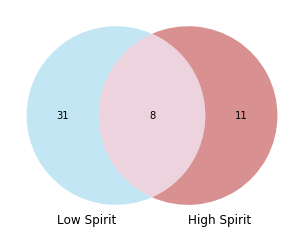

In [780]:
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles
from matplotlib import pyplot as plt
%matplotlib inline

venn2_unweighted(subsets = (31, 11, 8), set_labels = ('Low Spirit', 'High Spirit'), set_colors=('skyblue', 'firebrick'), alpha = 0.5);

# Fast or Slow?

In [641]:
fig = px.box(my_songs, y="tempo")
fig.show()

# World Wide

In [648]:
ww = pd.read_csv('top50.csv', encoding= 'unicode_escape')
ww.drop('Unnamed: 0', axis=1, inplace=True)
ww.head()

,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


In [662]:
ww.mean(axis=0)
avg_ww = pd.DataFrame({"danceability":[71.38/100], 
                             "energy":[64.06/100],
                             "key":[5.940000],
                             "loudness":[-5.66],
                             "mode":[0.800000],
                             "speechiness":[12.48/100],
                             "acousticness":[22.16/100],
                             "instrumentalness":[0.002873],
                             "liveness":[14.66/100],
                             "valence":[54.60/100],
                             "tempo":[120.06],
                             "duration_ms":[252700.720000],
                             "time_signature":[3.920000]})

avg_ww.drop('duration_ms', axis=1, inplace=True)
avg_ww.drop('time_signature', axis=1, inplace=True)
avg_ww.drop('instrumentalness', axis=1, inplace=True)
avg_ww['Who'] = 'Everyone'

avg_ww


,danceability,energy,key,loudness,mode,speechiness,acousticness,liveness,valence,tempo,Who
0,0.7138,0.6406,5.94,-5.66,0.8,0.1248,0.2216,0.1466,0.546,120.06,Everyone


In [665]:
avg_my_songs['Who'] = 'Me'
avg_my_songs

,danceability,energy,key,loudness,mode,speechiness,acousticness,liveness,valence,tempo,Who
0,0.62214,0.59316,5.94,-6.4605,0.8,0.06724,0.35972,0.15552,0.45466,116.11744,Me


In [673]:
average = avg_ww.append(avg_my_songs)
average

,danceability,energy,key,loudness,mode,speechiness,acousticness,liveness,valence,tempo,Who
0,0.71380,0.64060,5.94,-5.6600,0.8,0.12480,0.22160,0.14660,0.54600,120.06000,Everyone
0,0.62214,0.59316,5.94,-6.4605,0.8,0.06724,0.35972,0.15552,0.45466,116.11744,Me


In [706]:
average.to_excel('song12.xlsx', index=True)

In [733]:
average_comp = pd.read_csv('song12.csv', encoding= 'unicode_escape')
average_comp.rename(columns = {"Unnamed: 0":"Feature"}, inplace = True)
average_comp

,Feature,Everyone,Me
0,danceability,0.7138,0.62214
1,energy,0.6406,0.59316
2,key,5.9400,5.94000
3,loudness,-5.6600,-6.46050
4,mode,0.8000,0.80000
5,speechiness,0.1248,0.06724
6,acousticness,0.2216,0.35972
7,liveness,0.1466,0.15552
8,valence,0.5460,0.45466
9,tempo,120.0600,116.11744


In [755]:
average_compare = average_comp.drop(average_comp.index[9])
average_compare = average_compare.drop(average_compare.index[2])
compare_features = average_compare.drop(average_compare.index[2])
compare_features

,Feature,Everyone,Me
0,danceability,0.7138,0.62214
1,energy,0.6406,0.59316
4,mode,0.8000,0.80000
5,speechiness,0.1248,0.06724
6,acousticness,0.2216,0.35972
7,liveness,0.1466,0.15552
8,valence,0.5460,0.45466


In [778]:

trace1=go.Bar(x=compare_features['Feature'],y=compare_features['Everyone'],marker=dict(color='firebrick',opacity=1),name="Everyone")
trace2=go.Bar(x=compare_features['Feature'],y=compare_features['Me'],marker=dict(color='darksalmon',opacity=1),name="Me")

data=[trace1,trace2]

layout = go.Layout(title="My Music Preferences VS The World's",xaxis=dict(title="Features"),
                   barmode="group")

fig = go.Figure(data,layout)

fig.show()


In [819]:
loudness = pd.DataFrame({"Who":['Everyone', 'Me'],"Loudness":[-5.6600,-6.4605]})
loudness

,Who,Loudness
0,Everyone,-5.6600
1,Me,-6.4605


In [823]:
fig = px.bar(x=loudness['Who'], y=loudness['Loudness'],
              labels={"y": "Loudness Index",
                     "x": " "},
              color_discrete_sequence=px.colors.sequential.RdBu, title="Loudness Preference")

fig.show()

In [826]:
tempo = pd.DataFrame({"Who":['Everyone', 'Me'],"Tempo":[120.06000,116.11744]})
tempo


,Who,Tempo
0,Everyone,120.06000
1,Me,116.11744


In [828]:
fig = px.bar(x=loudness['Who'], y=tempo['Tempo'],
              labels={"y": "Tempo Index",
                     "x": " "},
              color_discrete_sequence=px.colors.sequential.RdBu, title="Tempo Preference")

fig.show()